<H1>Importing Necessary Libraries</H1>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import sqlalchemy

<h3>Exported Sql File into a csv and reading with pandas</h3>

In [2]:
orders = pd.read_csv("orders.csv")
users = pd.read_json("users.json")
rest = pd.read_csv("restaurants_csv.csv")

In [11]:
user_orders = users.merge(orders)

In [23]:
rest.drop(columns = "restaurant_name")

,restaurant_id,cuisine,rating
0,1,Chinese,4.8
1,2,Indian,4.1
2,3,Mexican,4.3
3,4,Chinese,4.1
4,5,Chinese,4.8
...,...,...,...
495,496,Indian,3.1
496,497,Mexican,4.4
497,498,Chinese,3.9
498,499,Mexican,4.9


In [24]:
rest = rest.drop(columns = "restaurant_name")

In [26]:
Final = user_orders.merge(rest)
Final

,user_id,name,city,membership,order_id,restaurant_id,order_date,total_amount,restaurant_name,cuisine,rating
0,1,User_1,Chennai,Regular,5767,375,12-07-2023,1289.66,Hotel Delights Multicuisine,Chinese,4.3
1,2,User_2,Pune,Gold,385,121,04-03-2023,1082.71,Sri Delights Non-Veg,Indian,4.1
2,2,User_2,Pune,Gold,1544,252,03-08-2023,529.90,New Eatery South Indian,Indian,3.7
3,2,User_2,Pune,Gold,1683,333,05-12-2023,505.71,Amma Mess Multicuisine,Chinese,3.1
4,2,User_2,Pune,Gold,1697,289,07-07-2023,588.06,Sri Biryani Punjabi,Italian,4.8
...,...,...,...,...,...,...,...,...,...,...,...
9995,2998,User_2998,Bangalore,Regular,6340,78,09-12-2023,1312.51,Sri Kitchen Chinese,Indian,3.5
9996,2998,User_2998,Bangalore,Regular,8571,266,15-07-2023,678.17,Annapurna Delights Multicuisine,Italian,3.9
9997,2999,User_2999,Pune,Regular,1944,223,05-06-2023,643.89,Amma Eatery Punjabi,Italian,3.4
9998,3000,User_3000,Hyderabad,Gold,1412,400,21-01-2023,1235.67,Ruchi Tiffins Non-Veg,Mexican,3.4


<h1>Sucessfully Merged 3 Files together</h1>

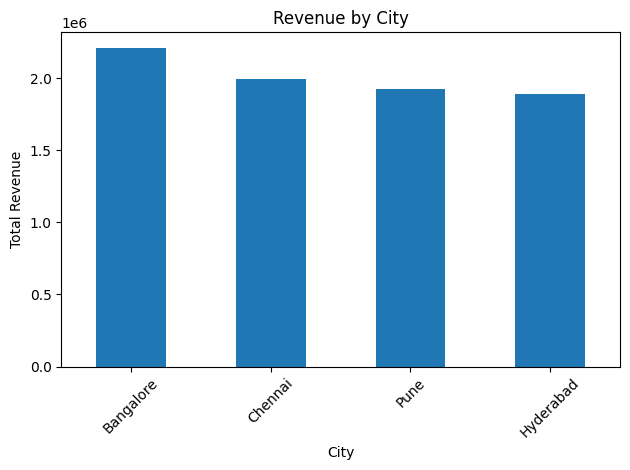

In [136]:
city_rev = Final.groupby("city")["total_amount"].sum().sort_values(ascending=False)

city_rev.plot(kind="bar")
plt.xlabel("City")
plt.ylabel("Total Revenue")
plt.title("Revenue by City")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


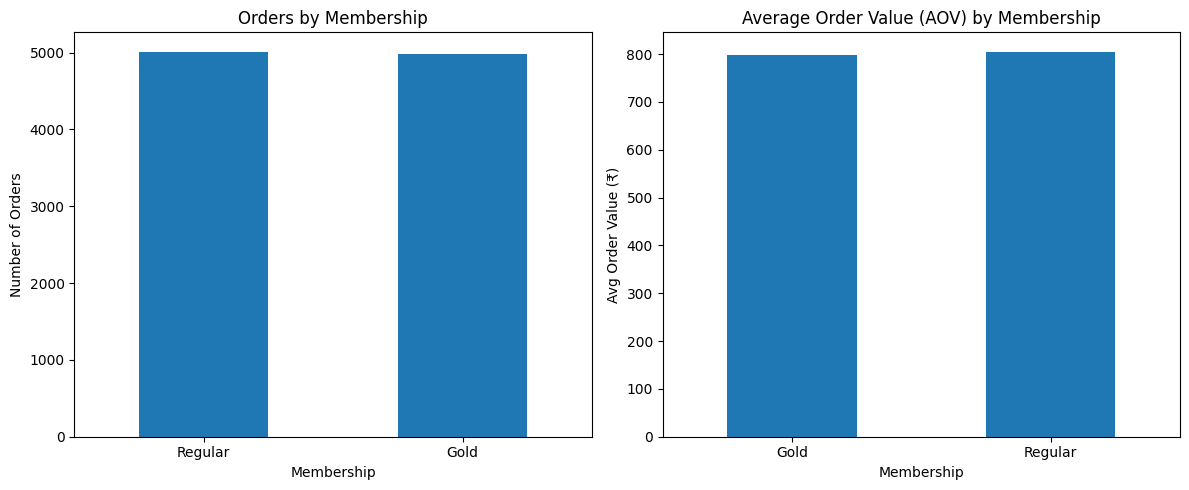

In [142]:
membership_orders = Final["membership"].value_counts()

membership_aov = (
    Final.groupby("membership")["total_amount"]
         .mean()
)

# --- Subplots ---
fig, axes = plt.subplots(1, 2, figsize=(12,5))

# Plot 1 → Orders
membership_orders.plot(kind="bar", ax=axes[0])
axes[0].set_title("Orders by Membership")
axes[0].set_xlabel("Membership")
axes[0].set_ylabel("Number of Orders")
axes[0].tick_params(axis="x", rotation=0)

# Plot 2 → AOV
membership_aov.plot(kind="bar", ax=axes[1])
axes[1].set_title("Average Order Value (AOV) by Membership")
axes[1].set_xlabel("Membership")
axes[1].set_ylabel("Avg Order Value (₹)")
axes[1].tick_params(axis="x", rotation=0)

plt.tight_layout()
plt.show()


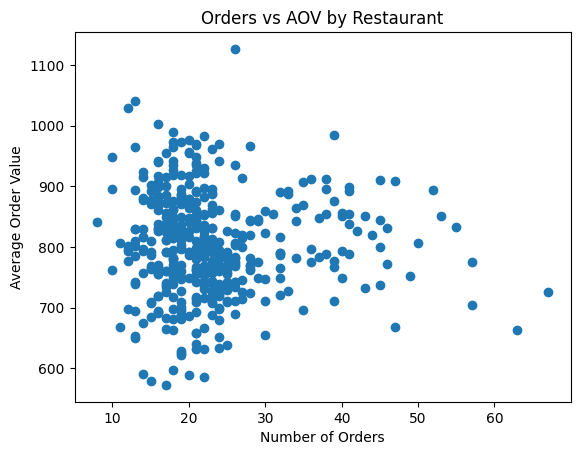

In [141]:
rest_stats = (
    Final.groupby("restaurant_name")["total_amount"]
         .agg(orders="count", aov="mean")
)

plt.scatter(rest_stats["orders"], rest_stats["aov"])

plt.xlabel("Number of Orders")
plt.ylabel("Average Order Value")
plt.title("Orders vs AOV by Restaurant")
plt.show()


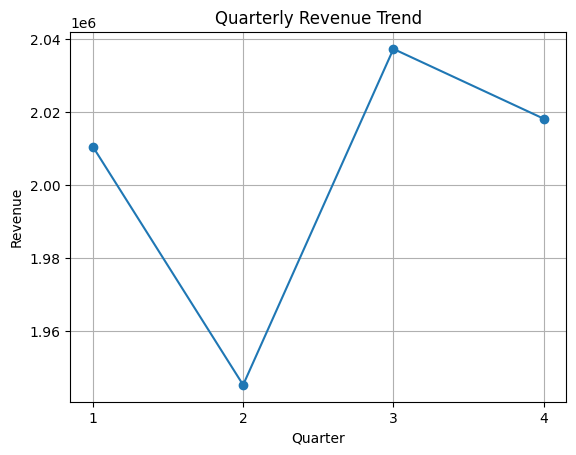

In [139]:
Final["order_date"] = pd.to_datetime(Final["order_date"], dayfirst=True)

quarter_rev = Final.groupby(Final["order_date"].dt.quarter)["total_amount"].sum()

quarter_rev.plot(kind="line", marker="o")
plt.xlabel("Quarter")
plt.ylabel("Revenue")
plt.title("Quarterly Revenue Trend")
plt.xticks([1,2,3,4])
plt.grid()
plt.show()


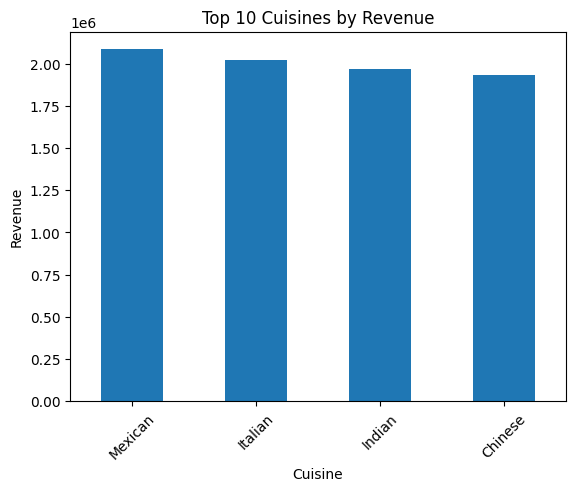

In [140]:
cuisine_rev = (
    Final.groupby("cuisine")["total_amount"]
         .sum()
         .sort_values(ascending=False)
         .head(10)
)

cuisine_rev.plot(kind="bar")
plt.xlabel("Cuisine")
plt.ylabel("Revenue")
plt.title("Top 10 Cuisines by Revenue")
plt.xticks(rotation=45)
plt.show()


<h4>Problem 1 - Gold Membership in various Cities</h4>

In [42]:
Final[Final['membership'].isin(['Gold'])]

,user_id,name,city,membership,order_id,restaurant_id,order_date,total_amount,restaurant_name,cuisine,rating
1,2,User_2,Pune,Gold,385,121,04-03-2023,1082.71,Sri Delights Non-Veg,Indian,4.1
2,2,User_2,Pune,Gold,1544,252,03-08-2023,529.90,New Eatery South Indian,Indian,3.7
3,2,User_2,Pune,Gold,1683,333,05-12-2023,505.71,Amma Mess Multicuisine,Chinese,3.1
4,2,User_2,Pune,Gold,1697,289,07-07-2023,588.06,Sri Biryani Punjabi,Italian,4.8
5,2,User_2,Pune,Gold,1892,245,06-06-2023,141.17,Classic Biryani North Indian,Mexican,3.5
...,...,...,...,...,...,...,...,...,...,...,...
9983,2996,User_2996,Hyderabad,Gold,5344,240,12-06-2023,532.27,New Mess Andhra,Indian,3.8
9984,2996,User_2996,Hyderabad,Gold,5516,95,03-08-2023,250.75,Classic Biryani North Indian,Indian,3.7
9985,2996,User_2996,Hyderabad,Gold,6562,201,20-02-2023,750.52,Spice Cafe Pure Veg,Mexican,3.4
9998,3000,User_3000,Hyderabad,Gold,1412,400,21-01-2023,1235.67,Ruchi Tiffins Non-Veg,Mexican,3.4


In [74]:
Final[Final.membership=="Gold"].groupby("city")["total_amount"].sum()

city
Bangalore     994702.59
Chennai      1080909.79
Hyderabad     896740.19
Pune         1003012.32
Name: total_amount, dtype: float64

<h4>Problem 2 - Different Cusines</h4>

In [75]:
Final['cuisine'].value_counts()

cuisine
Mexican    2581
Italian    2532
Indian     2469
Chinese    2418
Name: count, dtype: int64

<h4>Problem 3 - Unique Users who order above 1000 inr</h4>

In [86]:
(Final.groupby("user_id")["total_amount"].sum() > 1000).sum()

np.int64(2544)

<h4>Problem 4 - Sum of Various Ratings</h4>

In [94]:
Final.groupby(
    pd.cut(Final["rating"], [3.0,3.5,4.0,4.5,5.0])
)["total_amount"].sum()

C:\Users\tarun\AppData\Local\Temp\ipykernel_15684\2669736524.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  Final.groupby(


rating
(3.0, 3.5]    1881754.57
(3.5, 4.0]    1717494.41
(4.0, 4.5]    1960326.26
(4.5, 5.0]    2197030.75
Name: total_amount, dtype: float64

<h4>Problem 5 - Gold Membership spending per each City</h4>

In [96]:
Final.loc[Final["membership"]=="Gold"].groupby("city")["total_amount"].mean()

city
Bangalore    793.223756
Chennai      808.459080
Hyderabad    806.421034
Pune         781.162243
Name: total_amount, dtype: float64

<h4>Problem 6 - Cusines unique restaurants</h4>

In [97]:
Final.groupby("cuisine").agg({
    "restaurant_id": "nunique",
    "total_amount": "sum"
})

,restaurant_id,total_amount
cuisine,,
Chinese,120,1930504.65
Indian,126,1971412.58
Italian,126,2024203.80
Mexican,128,2085503.09


<h4>Problem 7 - Percentages of Gold membership</h4>

In [98]:
(Final["membership"] == "Gold").mean() * 100

np.float64(49.87)

<h4>Problem 8 - Highest Orders per restaurants</h4>

In [112]:


(
    Final.groupby(["restaurant_id", "restaurant_name"])["total_amount"]
         .agg(orders="count", avg_order_value="mean")
         .query("orders < 20")
         .sort_values("avg_order_value", ascending=False)
         .head(70)
)


,,orders,avg_order_value
restaurant_id,restaurant_name,,
294,Hotel Dhaba Multicuisine,13,1040.222308
262,Hotel Cafe Punjabi,18,1029.473333
77,Sri Mess Punjabi,12,1029.180833
193,Swagath Eatery Multicuisine,15,1026.306667
7,Ruchi Biryani Punjabi,16,1002.140625
...,...,...,...
136,Hotel Cafe South Indian,18,860.717222
83,Darbar Mess Pure Veg,16,860.636875
68,Taste of Biryani Andhra,16,860.447500


In [115]:
names = [
    "Grand Cafe Punjabi",
    "Grand Restaurant South Indian",
    "Ruchi Mess Multicuisine",
    "Ruchi Foods Chinese"
]

Final.loc[Final["restaurant_name"].isin(names)]


(
    Final.loc[Final["restaurant_name"].isin(names)]
         .groupby("restaurant_name")["total_amount"]
         .agg(orders="count", avg_order_value="mean")
)


,orders,avg_order_value
restaurant_name,,
Grand Cafe Punjabi,32,765.409063
Grand Restaurant South Indian,29,842.567586
Ruchi Foods Chinese,19,686.603158
Ruchi Mess Multicuisine,40,851.226250


<h4>Problem 9 - Cuisines corresponding to memberships</h4>

In [119]:
combo = (
    Final.groupby(["membership", "cuisine"])["total_amount"]
         .sum()
         .sort_values(ascending=False)
)

print(combo.head(10))


membership  cuisine
Regular     Mexican    1072943.30
            Italian    1018424.75
Gold        Mexican    1012559.79
            Italian    1005779.05
Regular     Indian      992100.27
Gold        Indian      979312.31
            Chinese     977713.74
Regular     Chinese     952790.91
Name: total_amount, dtype: float64


<h4>Converting a column into date time format</h4>

In [123]:
Final.groupby(pd.to_datetime(Final["order_date"], dayfirst=True).dt.quarter)["total_amount"].sum()

order_date
1    2010626.64
2    1945348.72
3    2037385.10
4    2018263.66
Name: total_amount, dtype: float64

<h4>Problem 10 - Gold orders</h4>

In [124]:
gold_orders = Final.loc[Final["membership"] == "Gold"].shape[0]
print(gold_orders)

4987


<h4>Problem 11 - Revenue from hyderabad</h4>

In [125]:
round(Final.loc[Final["city"]=="Hyderabad", "total_amount"].sum())

1889367

<h4>Problem 12 - Unique Users</h4>

In [126]:
Final["user_id"].nunique()


2883

<h4>Problem 13 - Average amount by 2 decimal places</h4>

In [127]:
round(Final.loc[Final["membership"]=="Gold", "total_amount"].mean(), 2)

np.float64(797.15)

<h4>Problem 14 - Ratings above 4.5</h4>

In [128]:
(Final["rating"] >= 4.5).sum()


np.int64(3374)

<h4>Problem 15 - Top revenue city</h4>

In [133]:
gold_df = Final.loc[Final["membership"] == "Gold"]

# Step 1: top revenue city
top_city = (
    gold_df.groupby("city")["total_amount"]
           .sum()
           .idxmax()
)

# Step 2: count orders in that city
orders = gold_df.loc[gold_df["city"] == top_city].shape[0]

print(top_city, orders)


Chennai 1337
